# Clustering Mini-project Wk 10

Aaron Palumbo

In [61]:
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt

import matplotlib.pyplot as plt

import os

%matplotlib inline

In [62]:
# Load and parse the data
data = sc.textFile("file://" + os.getcwd() + "/birch1.txt")
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ') if len(x) > 0]))

In [63]:
# Build the model (cluster the data)
clusters = KMeans.train(parsedData, 100, maxIterations=10,
                       runs=10, initializationMode="random")

In [64]:
clusters.centers[:20]

[array([ 818617.39928486,  627768.83194279]),
 array([ 909746.65784114,  543227.35437882]),
 array([ 911380.47532729,  266384.49043303]),
 array([ 911346.43043043,  635554.38638639]),
 array([ 371587.86353791,  541632.33501805]),
 array([ 359042.15571284,  267334.00505561]),
 array([ 910913.84123711,  727717.34123711]),
 array([ 450850.19961427,  358589.23818708]),
 array([  80482.88932806,  356930.0958498 ]),
 array([ 448779.49646821,  171440.29061554]),
 array([ 601398.22072937,  446089.86180422]),
 array([ 357952.15035318,   81701.29465187]),
 array([ 264141.77016575,  270548.31381215]),
 array([ 310392.08798972,  633245.53500321]),
 array([ 631938.90584416,  723563.92207792]),
 array([ 724622.42147923,  174452.18946302]),
 array([ 541198.94465649,  633300.98759542]),
 array([ 543071.47813121,  174071.18290258]),
 array([ 264712.77578475,   76301.91704036]),
 array([ 635045.09736308,  359016.22109533])]

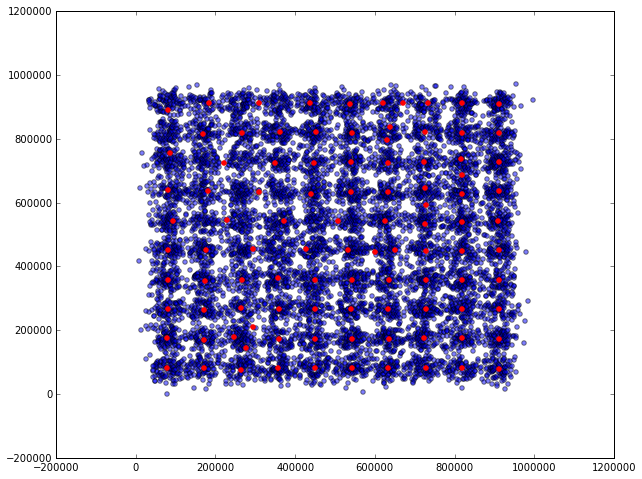

In [65]:
sampledData = parsedData.sample(False, 0.1, 81).collect()
[x, y] = array(sampledData).transpose()
[cx, cy] = array(clusters.centers).transpose()

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x, y, alpha=0.5)
ax.scatter(cx, cy, color="red")

In [66]:
clusters.k

100